In [2]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Heart Disease data.csv')

In [4]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [6]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [7]:
#Detecting and Handling Missing Values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
#Detecting duplicates
duplicates = df.duplicated()

In [9]:
#Printing the duplicate rows
print(df[duplicates])

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

In [10]:
# Identify exact duplicates
exact_duplicates = df[df.duplicated()]

In [11]:
# Count exact duplicates
num_exact_duplicates = exact_duplicates.shape[0]
print(f"Number of exact duplicates: {num_exact_duplicates}")

Number of exact duplicates: 723


In [12]:
# Display exact duplicates if any
print(exact_duplicates)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

In [13]:
df1 = df.drop_duplicates(keep='first', inplace=False)

In [14]:
print(df1)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

In [ ]:
#All the categorical variable are already in binary format. So, no need to convert the categorical variable into numerical format

<Axes: ylabel='trestbps'>

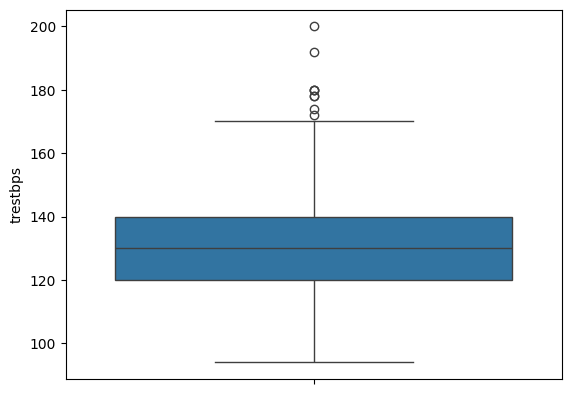

In [15]:
#Handling Outliers
sns.boxplot(data = df1['trestbps'])

In [16]:
Q1 = df1['trestbps'].quantile(0.25)
Q3 = df1['trestbps'].quantile(0.75)

In [17]:
IQR = Q3 - Q1

In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
outliers = df1[(df1['trestbps'] < lower_bound) | (df1['trestbps'] > upper_bound)]

In [20]:
df2 = df1.drop(outliers.index)

In [21]:
print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
29    55    0   0       180   327    0        2      117      1      3.4   
47    66    0   0       178   228    1        1      165      1      1.0   
87    59    0   0       174   249    0        1      143      1      0.0   
137   64    0   0       180   325    0        1      154      1      0.0   
151   54    1   1       192   283    0        0      195      0      0.0   
175   56    0   0       200   288    1        0      133      1      4.0   
343   52    1   2       172   199    1        1      162      0      0.5   
396   68    1   2       180   274    1        0      150      1      1.6   
528   59    1   3       178   270    0        0      145      0      4.2   

     slope  ca  thal  target  
29       1   0     2       0  
47       1   2     3       0  
87       1   0     2       0  
137      2   0     2       1  
151      2   1     3       0  
175      0   2     3       0  
343      2   0     3  

<Axes: ylabel='trestbps'>

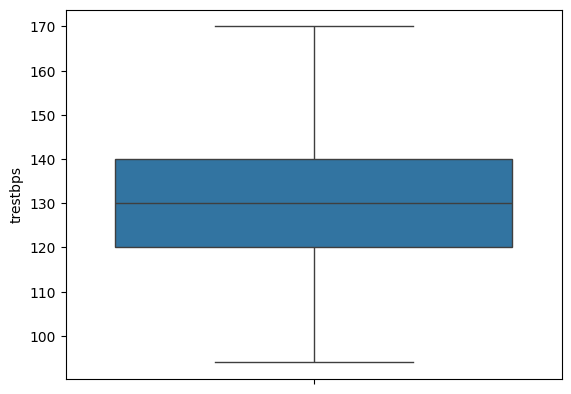

In [22]:
sns.boxplot(data = df2['trestbps'])

In [23]:
print(df2)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

<Axes: ylabel='chol'>

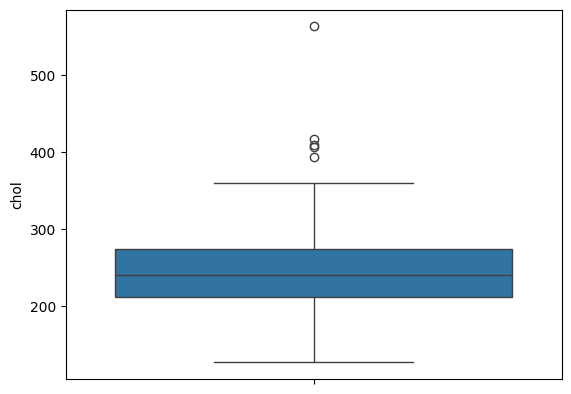

In [140]:
sns.boxplot(data = df2['chol'])

In [141]:
Q1 = df2['chol'].quantile(0.25)
Q3 = df2['chol'].quantile(0.75)

In [142]:
IQR = Q3 - Q1

In [143]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [144]:
outliers = df2[(df2['chol'] < lower_bound) | (df2['chol'] > upper_bound)]

In [145]:
df3 = df2.drop(outliers.index)

In [146]:
print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   

     slope  ca  thal  target  
123      2   1     2       1  
158      1   0     3       1  
179      1   2     3       0  
255      1   0     2       1  
450      1   3     3       0  


<Axes: ylabel='chol'>

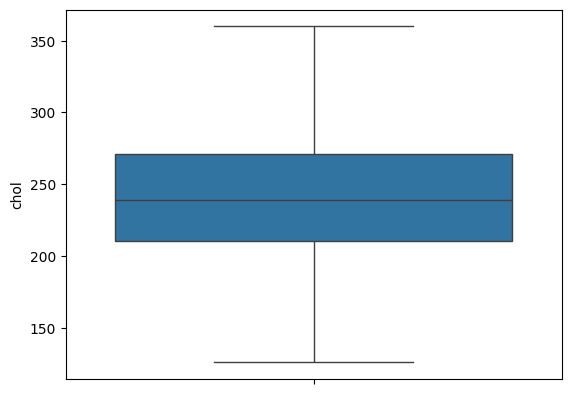

In [147]:
sns.boxplot(data = df3['chol'])

In [148]:
print(df3)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

<Axes: ylabel='thalach'>

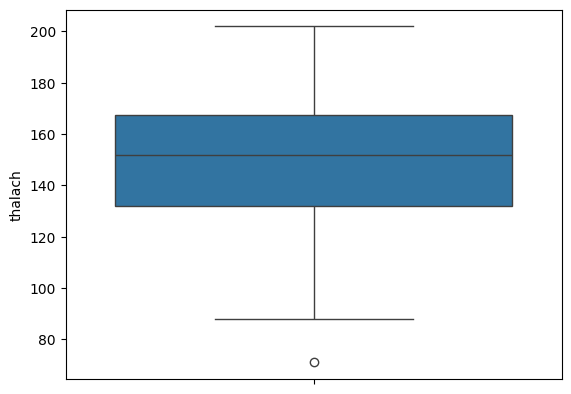

In [149]:
sns.boxplot(data = df3['thalach'])

In [150]:
Q1 = df2['thalach'].quantile(0.25)
Q3 = df2['thalach'].quantile(0.75)

In [151]:
IQR = Q3- Q1

In [152]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [153]:
outliers = df3[(df3['thalach'] < lower_bound) | (df3['thalach'] > upper_bound)]

In [154]:
df4 = df3.drop(outliers.index)

In [155]:
print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
267   67    1   0       120   237    0        1       71      0      1.0   

     slope  ca  thal  target  
267      1   0     2       0  


<Axes: ylabel='thalach'>

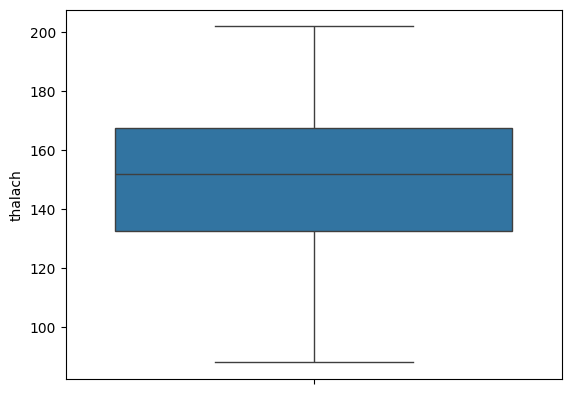

In [156]:
sns.boxplot(data = df4['thalach'])

In [157]:
print(df4)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

<Axes: ylabel='oldpeak'>

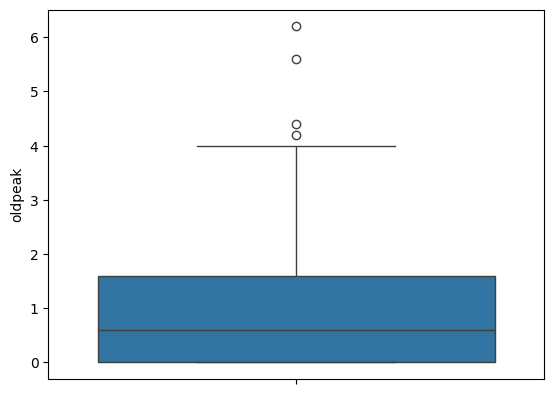

In [158]:
sns.boxplot(data = df4['oldpeak'])

In [159]:
Q1 = df4['oldpeak'].quantile(0.25)
Q3 = df4['oldpeak'].quantile(0.75)

In [160]:
IQR = Q3 - Q1

In [161]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [162]:
outliers = df4[(df4['oldpeak'] < lower_bound) | (df4['oldpeak'] > upper_bound)]

In [163]:
df5 = df4.drop(outliers.index)

In [164]:
print(outliers)

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
6    58    1   0       114   318    0        2      140      0      4.4   
13   51    1   0       140   298    0        1      122      1      4.2   
54   55    1   0       140   217    0        1      111      1      5.6   
69   62    0   0       160   164    0        0      145      0      6.2   

    slope  ca  thal  target  
6       0   3     1       0  
13      1   3     3       0  
54      0   0     3       0  
69      0   3     3       0  


In [165]:
print(df5)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

<Axes: ylabel='age'>

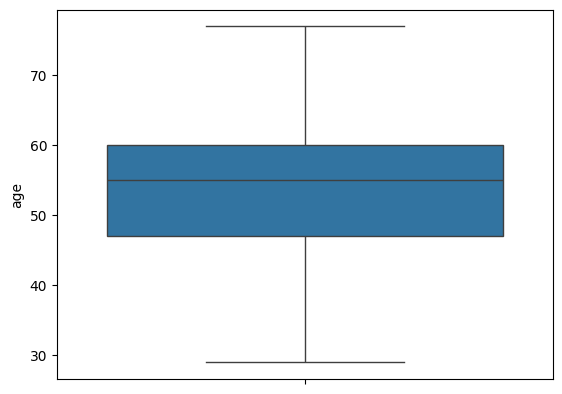

In [166]:
sns.boxplot(data = df5['age'])

<Axes: ylabel='fbs'>

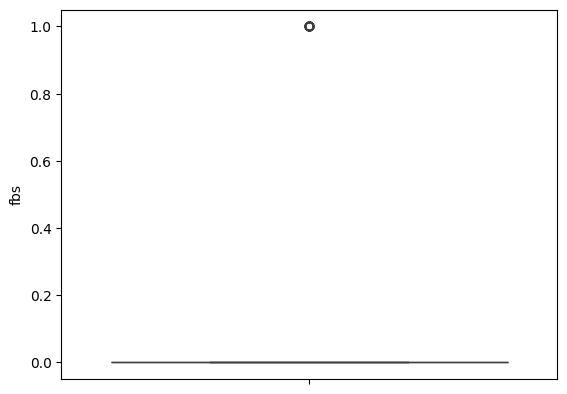

In [167]:
sns.boxplot(data = df5['fbs'])

<Axes: ylabel='target'>

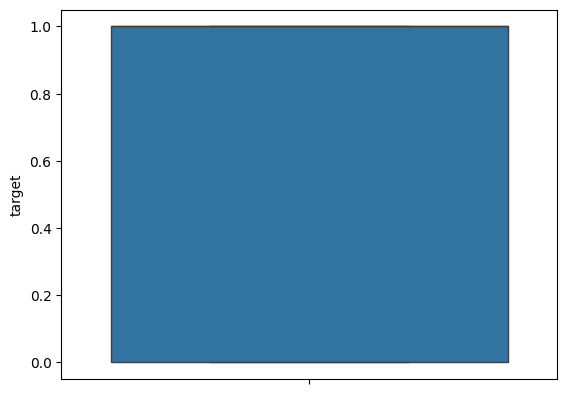

In [168]:
sns.boxplot(data = df5['target'])

<Axes: ylabel='thal'>

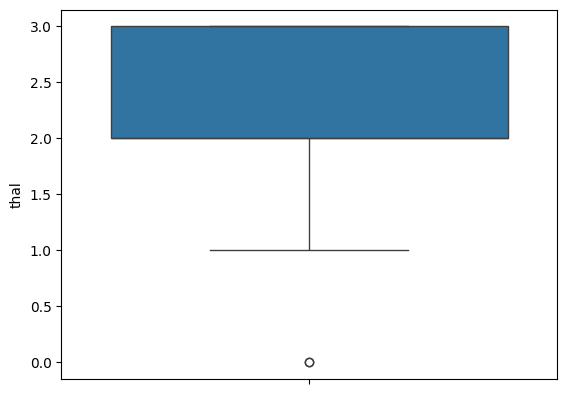

In [169]:
sns.boxplot(data = df5['thal'])

In [170]:
print(df5.head(20))

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   0       125   212    0        1      168      0      1.0   
1    53    1   0       140   203    1        0      155      1      3.1   
2    70    1   0       145   174    0        1      125      1      2.6   
3    61    1   0       148   203    0        1      161      0      0.0   
4    62    0   0       138   294    1        1      106      0      1.9   
5    58    0   0       100   248    0        0      122      0      1.0   
7    55    1   0       160   289    0        0      145      1      0.8   
8    46    1   0       120   249    0        0      144      0      0.8   
9    54    1   0       122   286    0        0      116      1      3.2   
10   71    0   0       112   149    0        1      125      0      1.6   
11   43    0   0       132   341    1        0      136      1      3.0   
12   34    0   1       118   210    0        1      192      0      0.7   
14   52    1   0       12

In [171]:
print(df5.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean    54.049470    0.699647    0.985866  129.883392  242.314488    0.141343   
std      9.128186    0.459224    1.031324   15.387795   44.654188    0.348992   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  210.500000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  239.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  270.500000    0.000000   
max     77.000000    1.000000    3.000000  170.000000  360.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean     0.522968  149.961131    0.318021    0.951943    1.427562    0.696113   
std      0.514336   22.6916

In [172]:
from scipy.stats import skew
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [173]:
skewness = df5[numerical_columns].apply(skew) 

In [174]:
print(skewness)

age        -0.143615
trestbps    0.257799
chol        0.202621
thalach    -0.480943
oldpeak     0.919366
dtype: float64


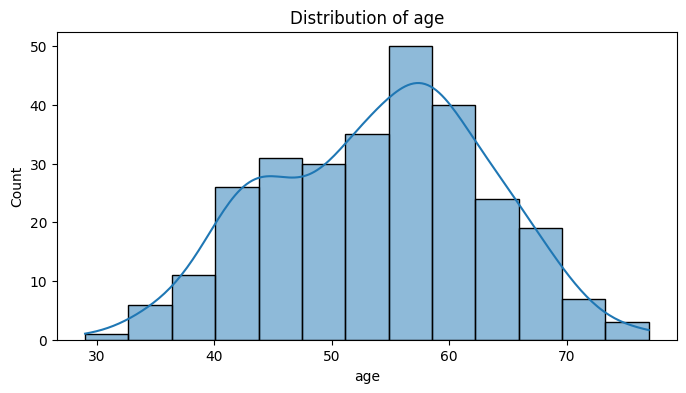

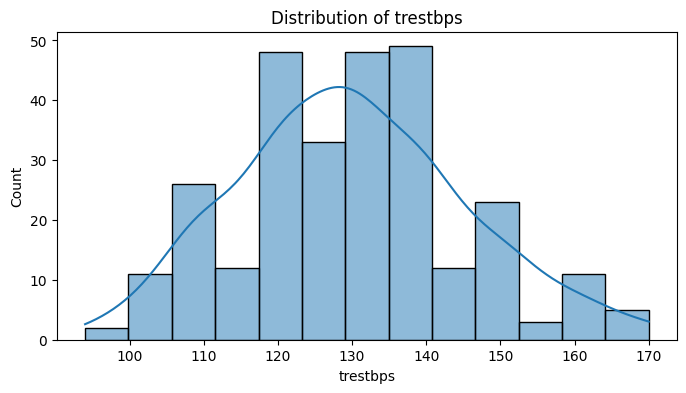

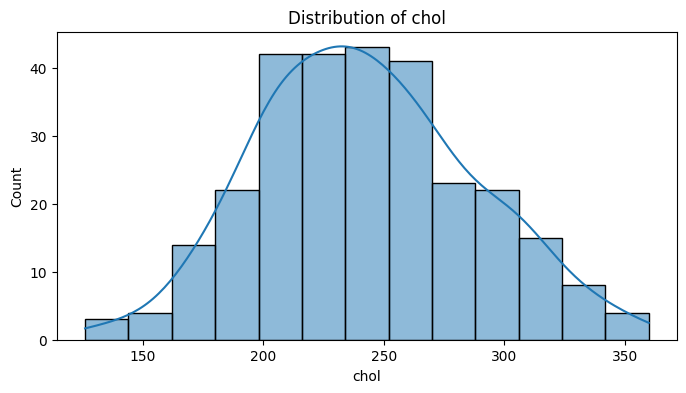

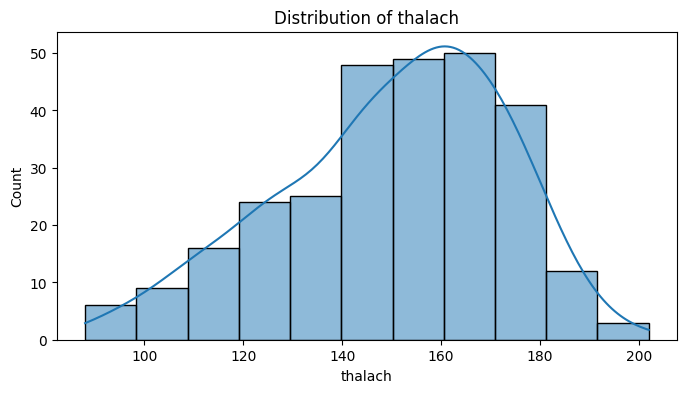

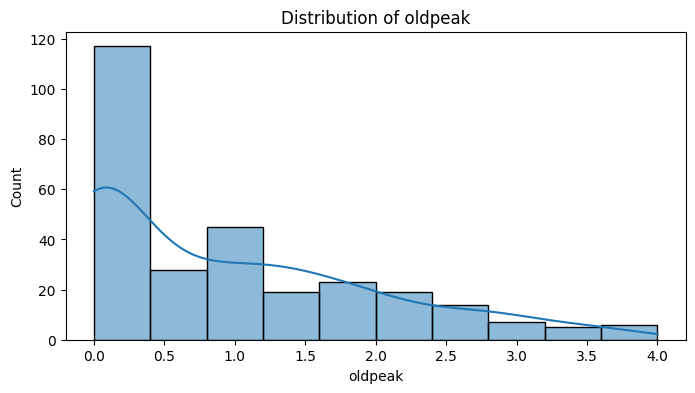

In [175]:
import matplotlib.pyplot as plt
# Visualize the distribution
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df5[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [176]:
#Applying Square root transformation to oldpeak column
df5['oldpeak'] = np.sqrt(df5['oldpeak'])

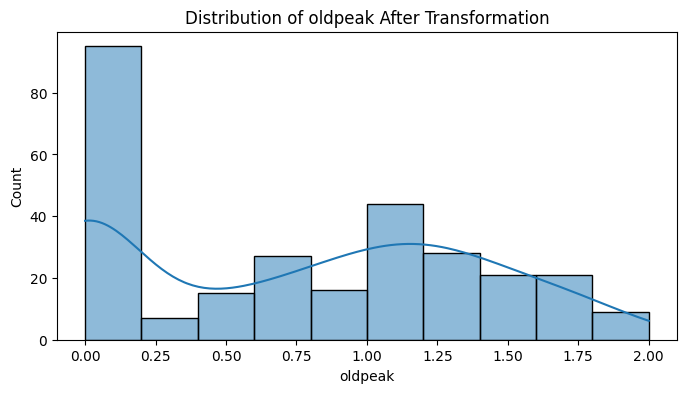

In [177]:
# Assuming df is your DataFrame and 'Unit Price' is the column you want to visualize
plt.figure(figsize=(8, 4))
sns.histplot(df5['oldpeak'], kde=True)
plt.title('Distribution of oldpeak After Transformation')
plt.show()

In [178]:
skewness = df5['oldpeak'].skew()

In [179]:
print(skewness)

0.0946136147655898


In [180]:
import pandas as pd
from scipy import stats

# Before applying Box-Cox transformation, make sure there are no zero or negative values in 'oldpeak'
if any(df5['oldpeak'] <= 0):
    print("Cannot apply Box-Cox transformation as 'oldpeak' contains zero or negative values.")
else:
    # Apply Box-Cox transformation
    df5['oldpeak'], fitted_lambda = stats.boxcox(df5['oldpeak'])

Cannot apply Box-Cox transformation as 'oldpeak' contains zero or negative values.


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

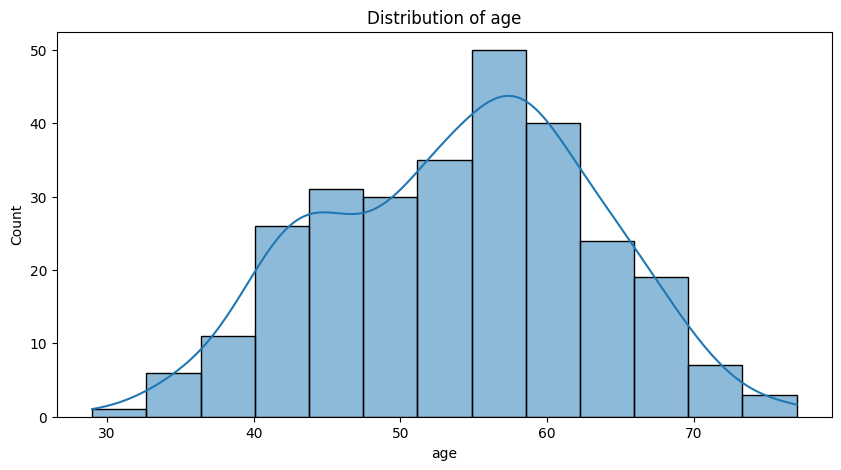

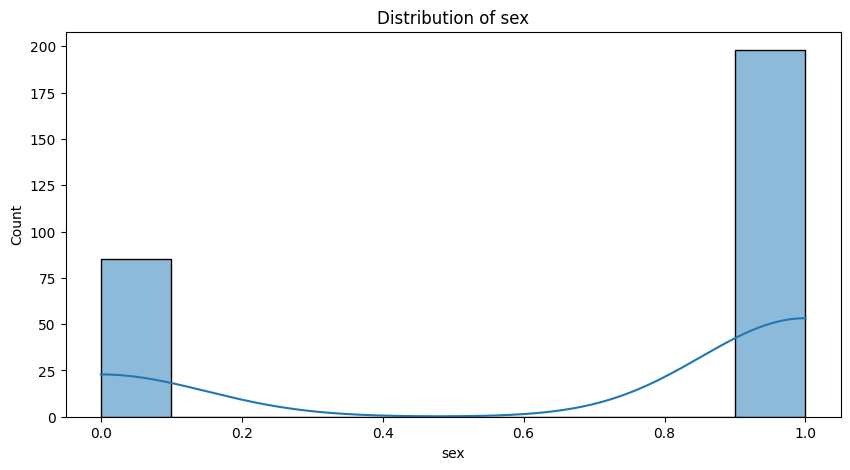

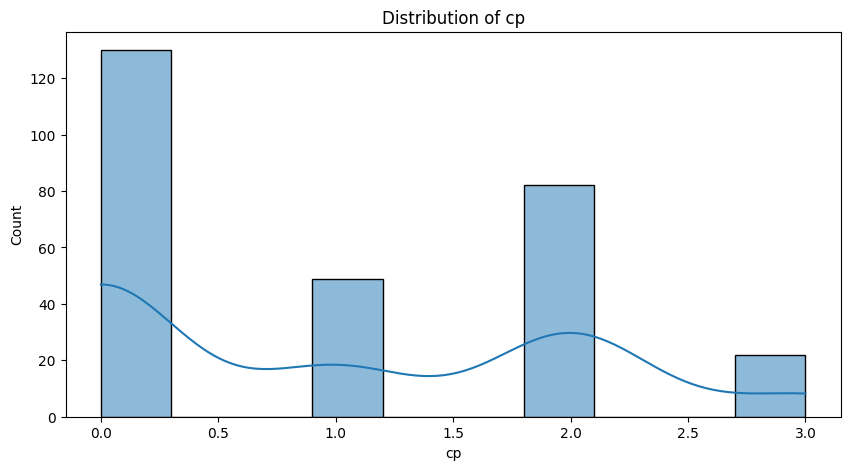

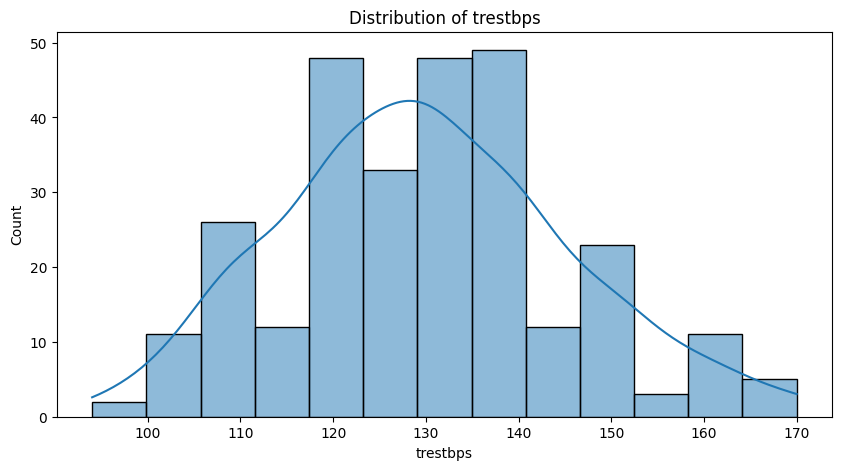

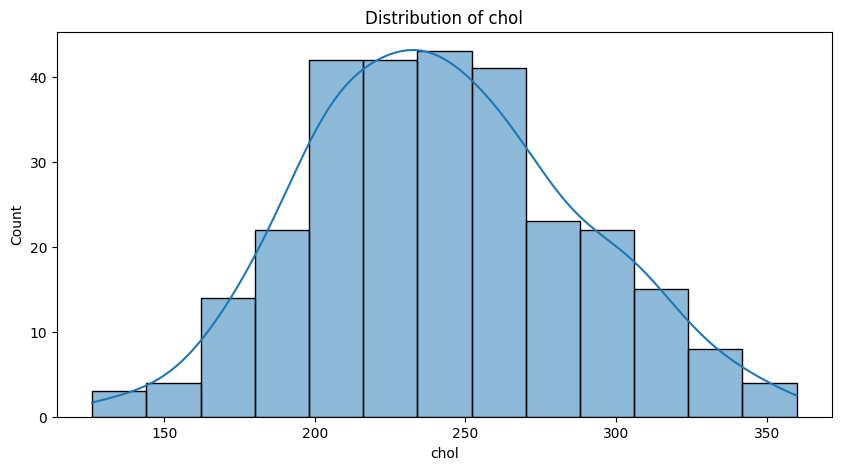

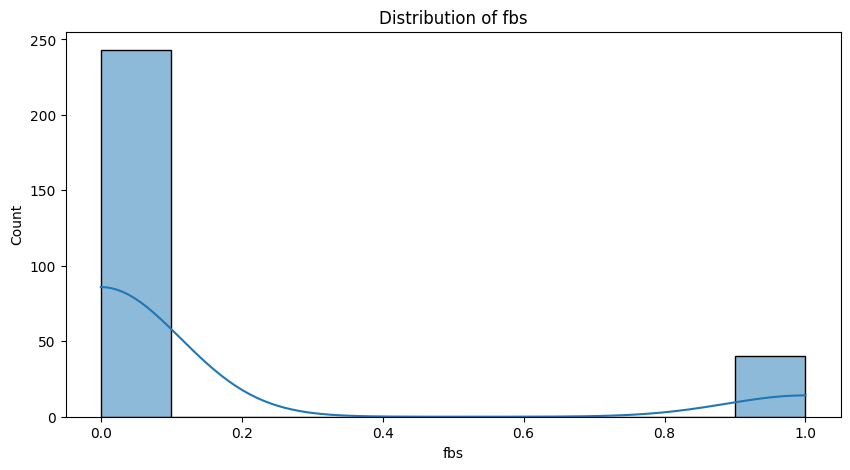

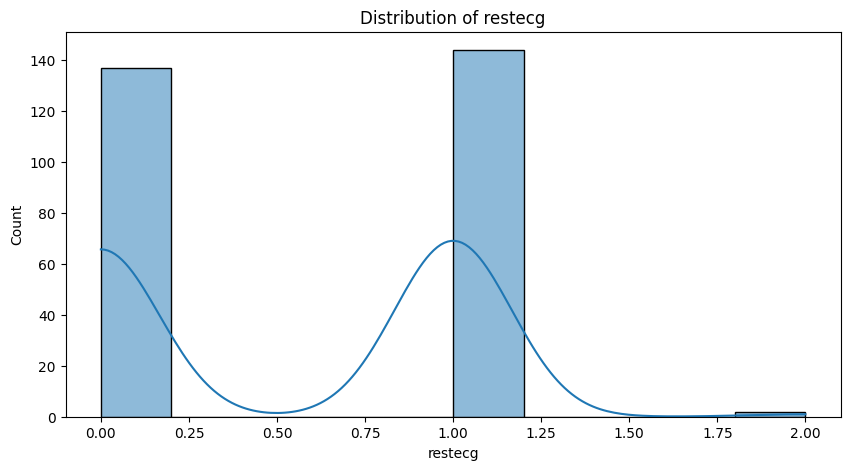

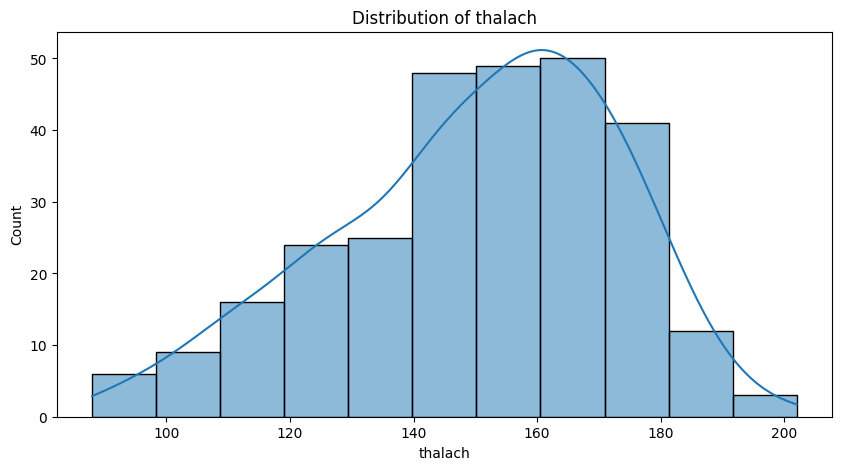

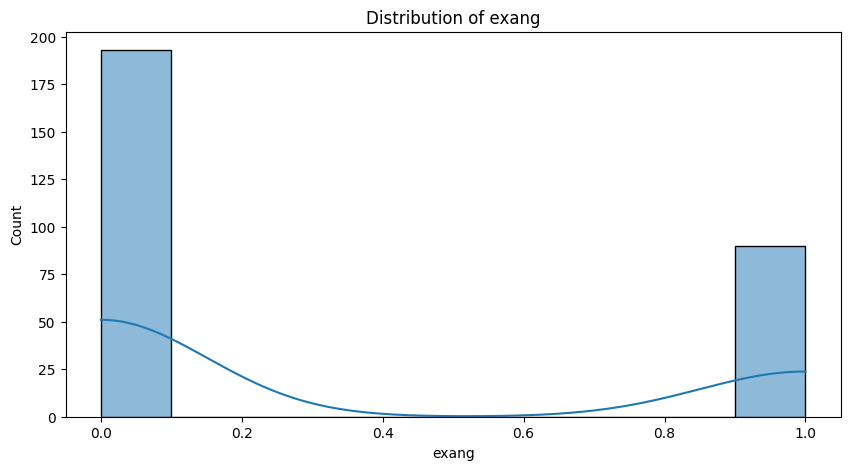

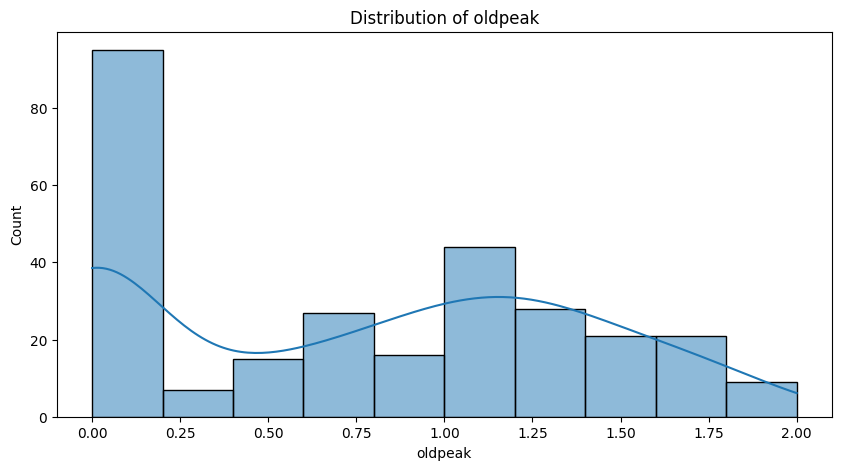

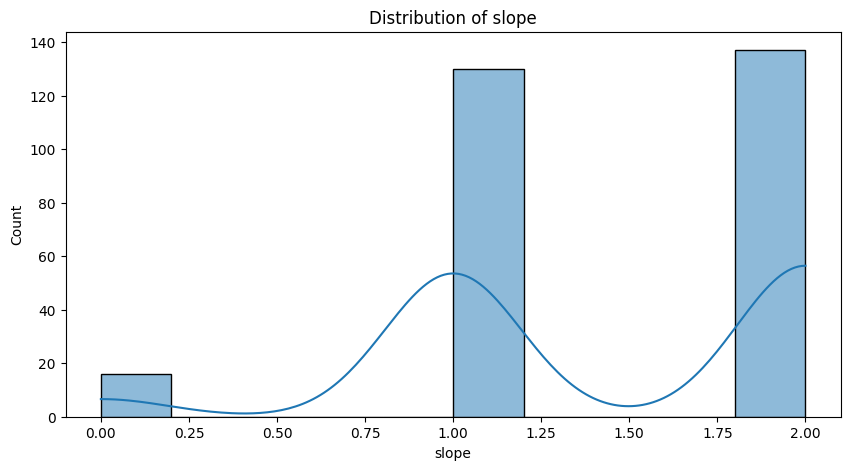

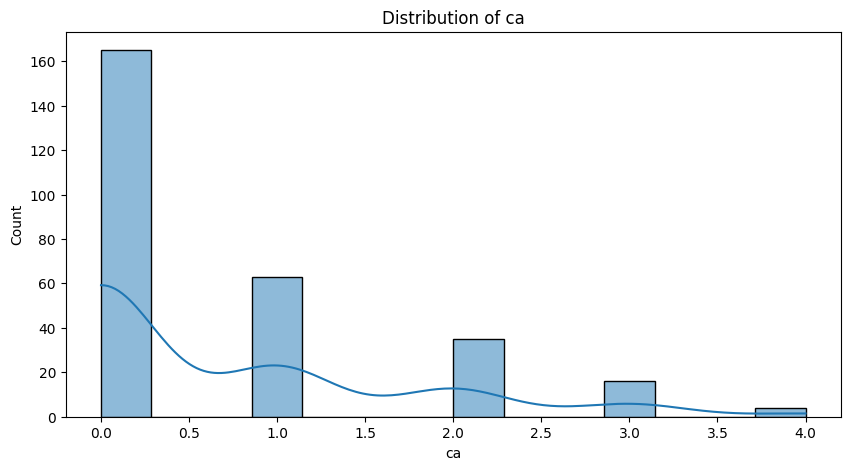

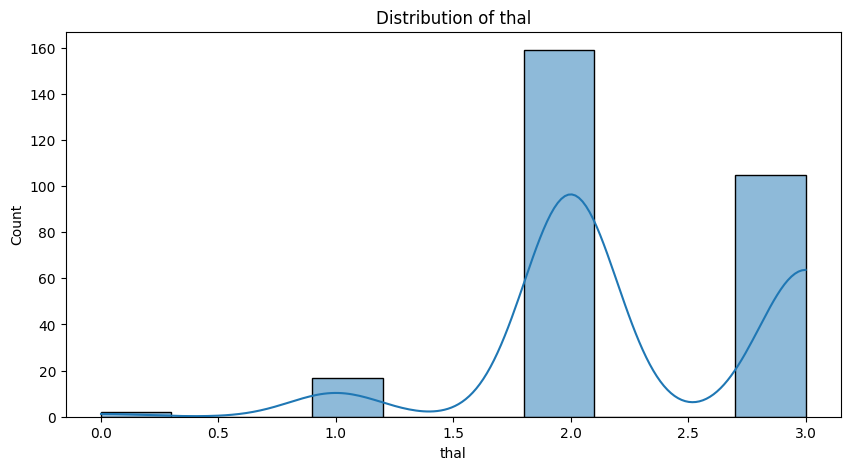

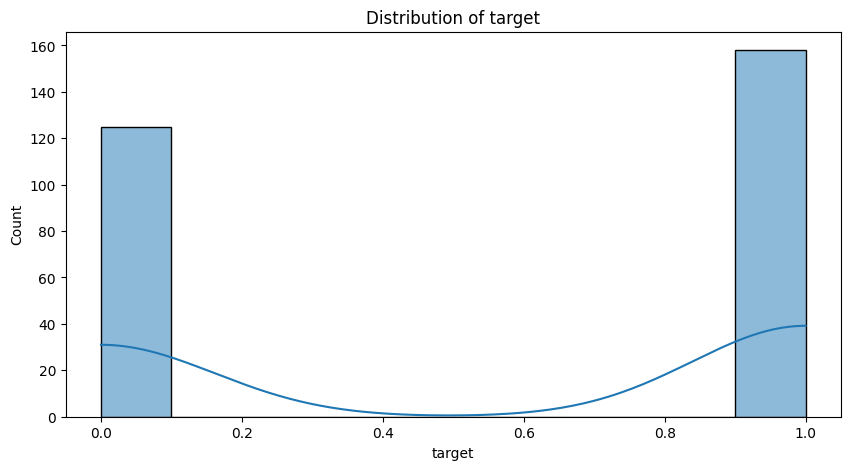

In [182]:
#Visualization through Histogram
for column in df5.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df5[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

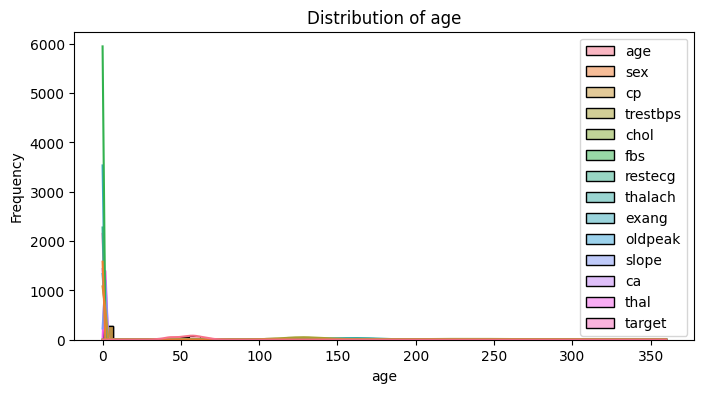

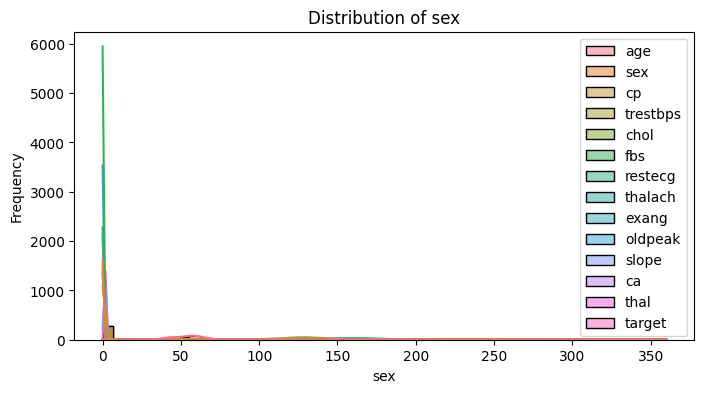

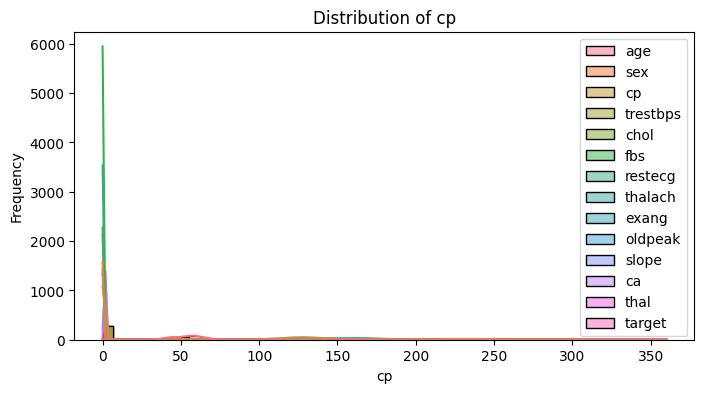

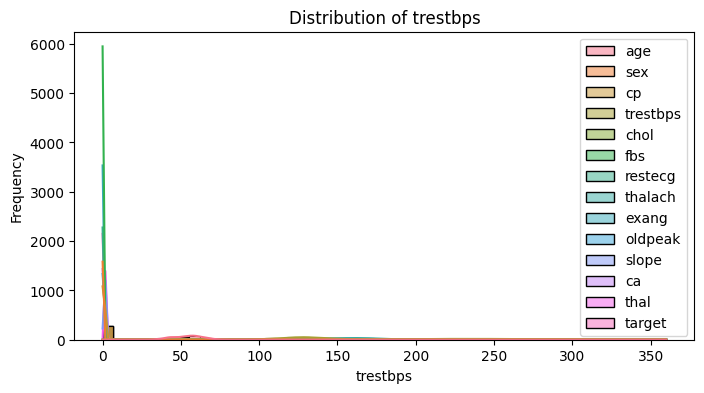

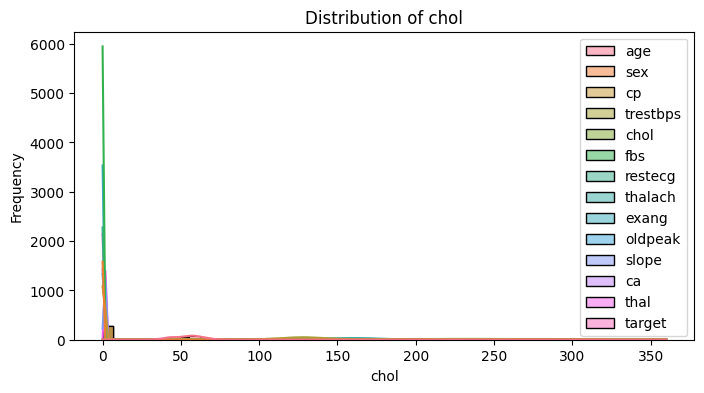

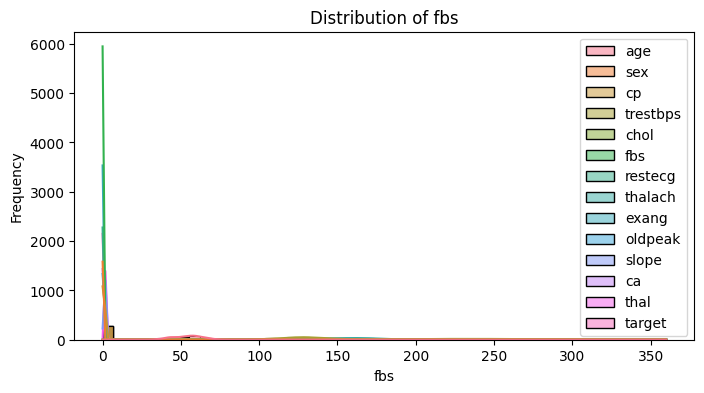

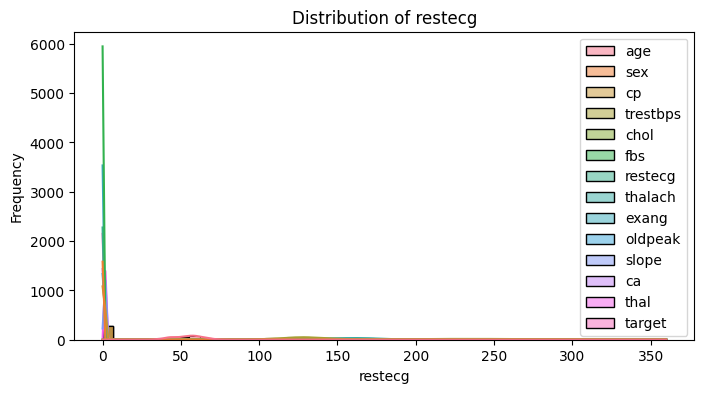

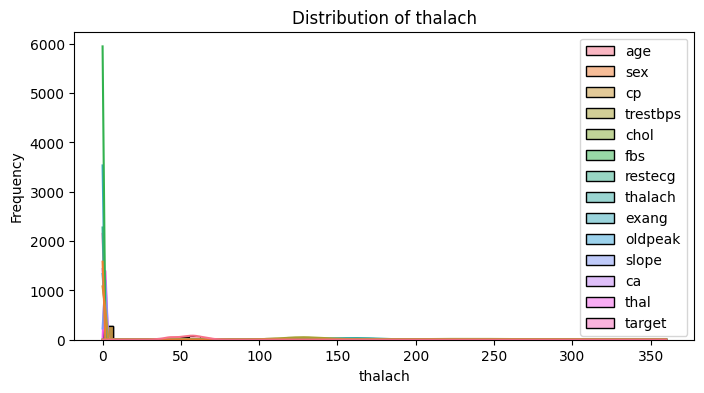

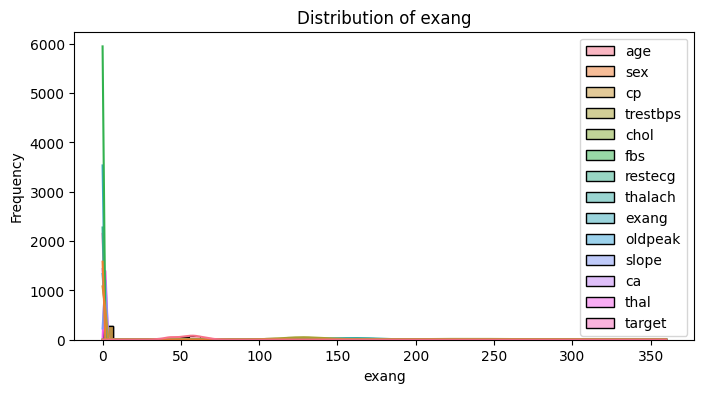

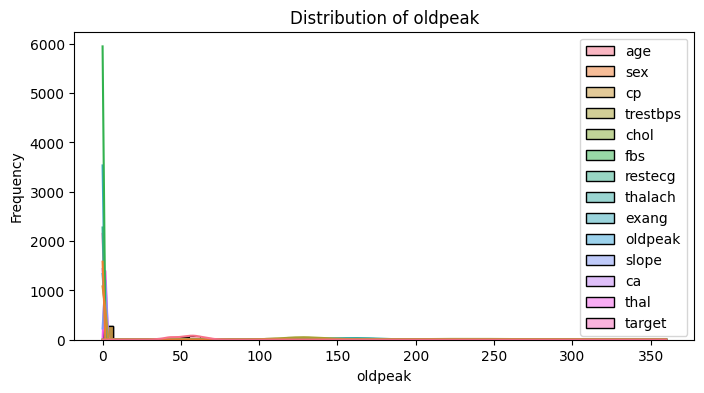

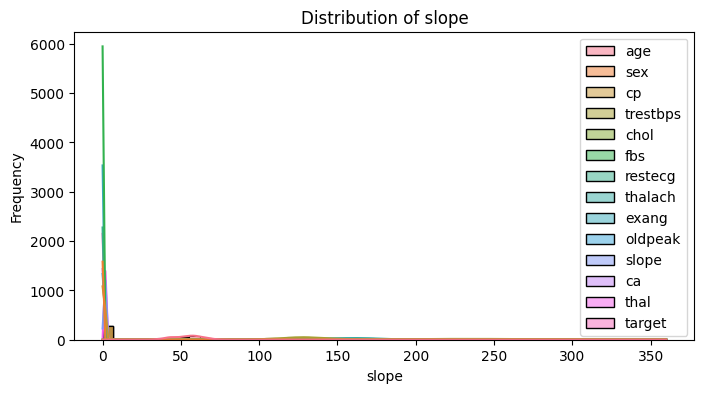

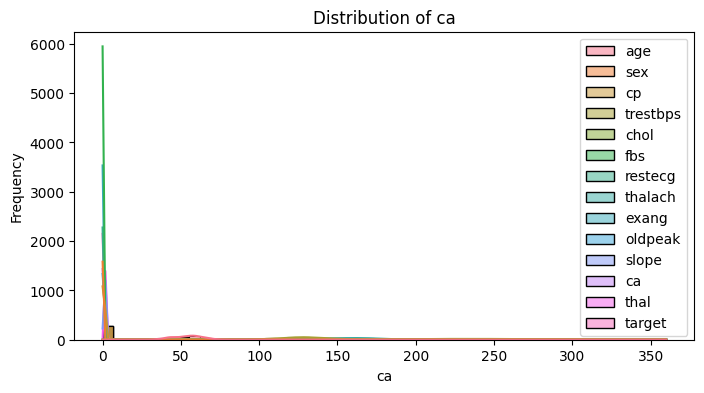

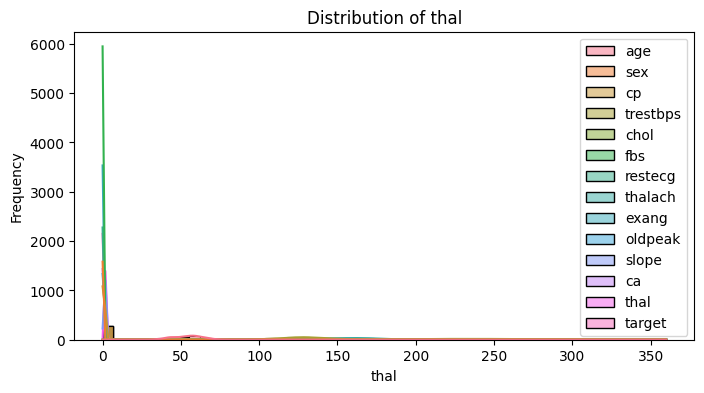

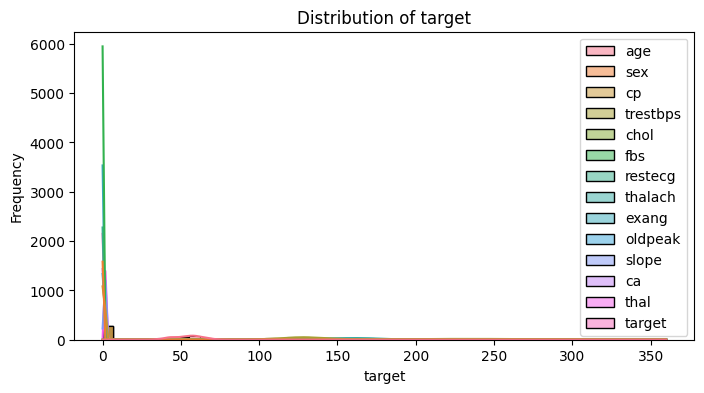

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df5 is your DataFrame
# Select only the numerical columns
numerical_columns = df5.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df5[numerical_columns], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

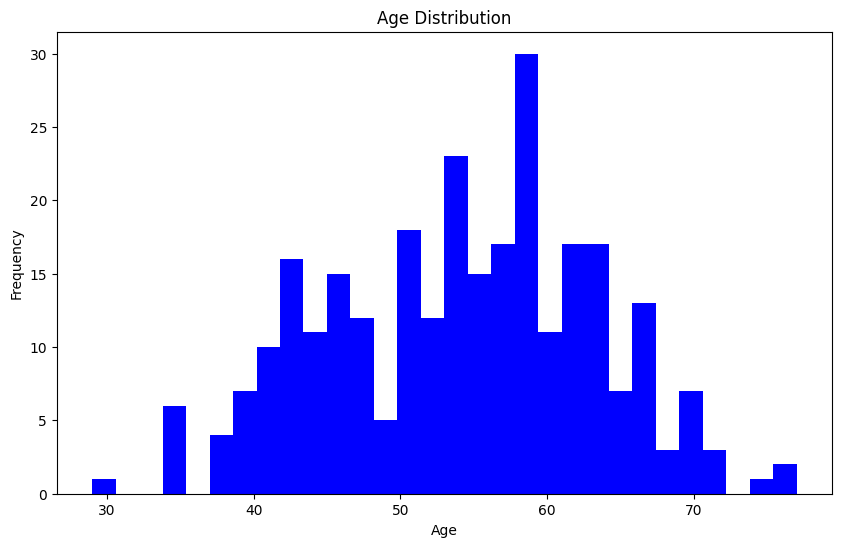

In [184]:
#Visualizing the Numerical Variables
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df5['age'], bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

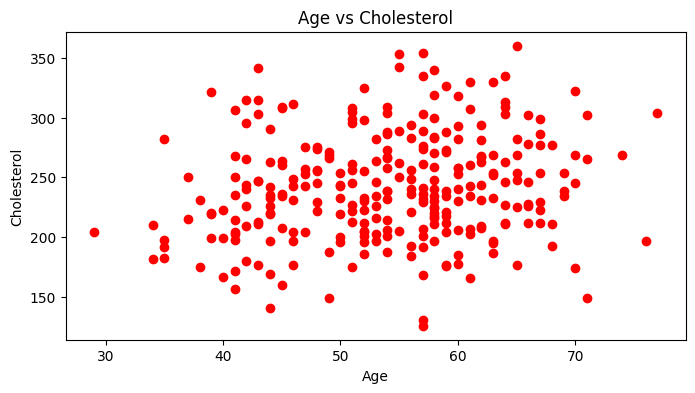

In [185]:
# Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df5['age'], df5['chol'], color='red')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

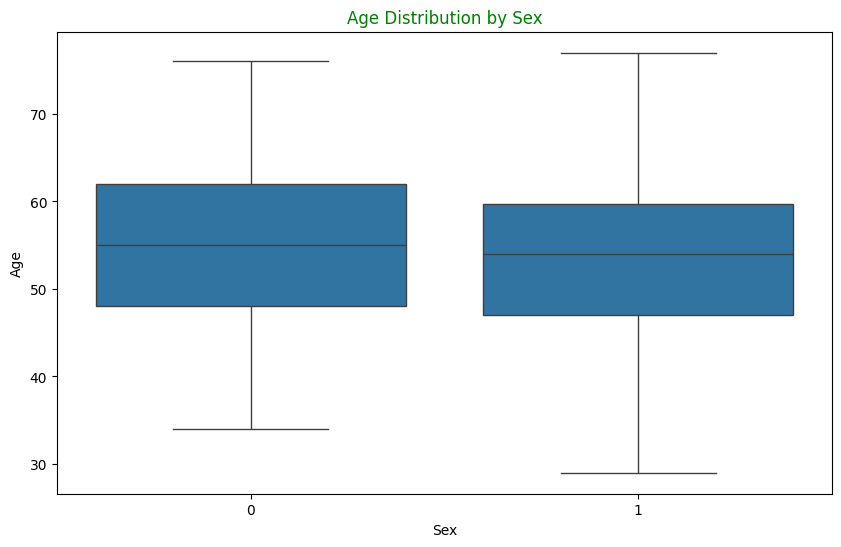

In [186]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df5)
plt.title('Age Distribution by Sex', color = 'green')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

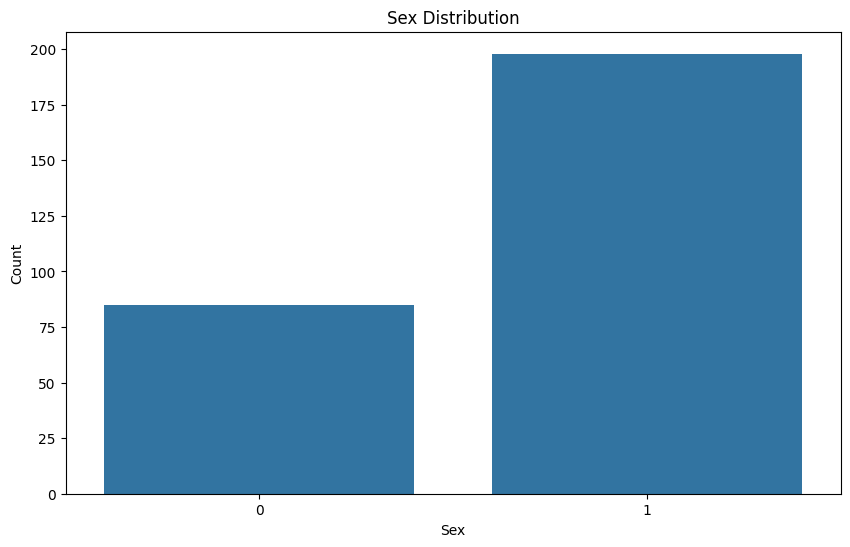

In [187]:
#Plotting the Categorical Data
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot (Histogram for categorical data)
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df5)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

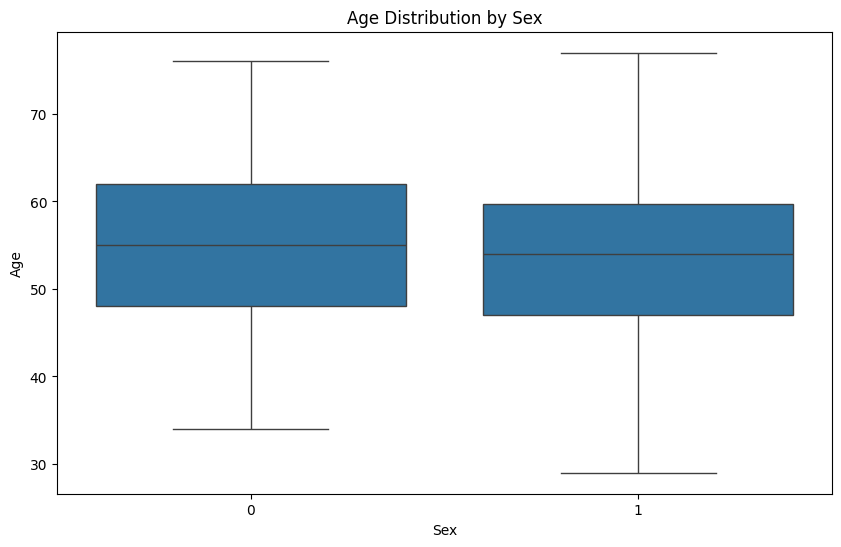

In [188]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df5)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

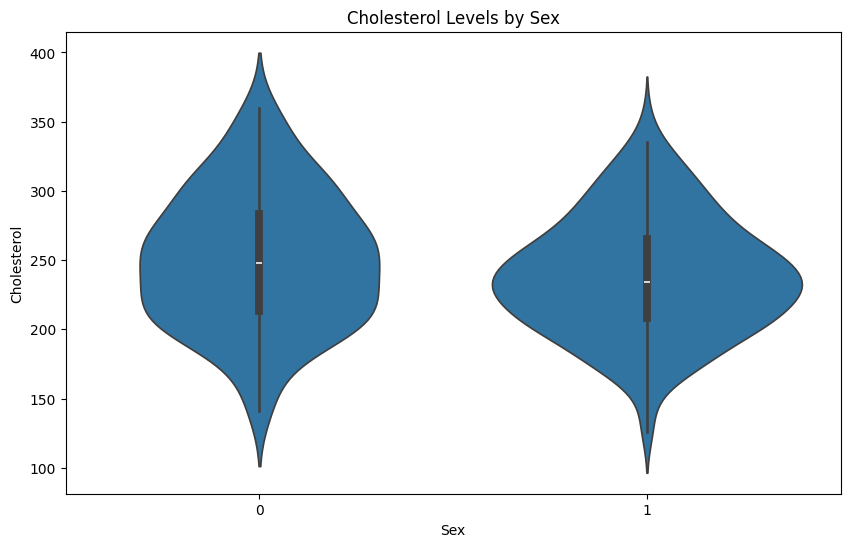

In [189]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='chol', data=df5)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

In [190]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

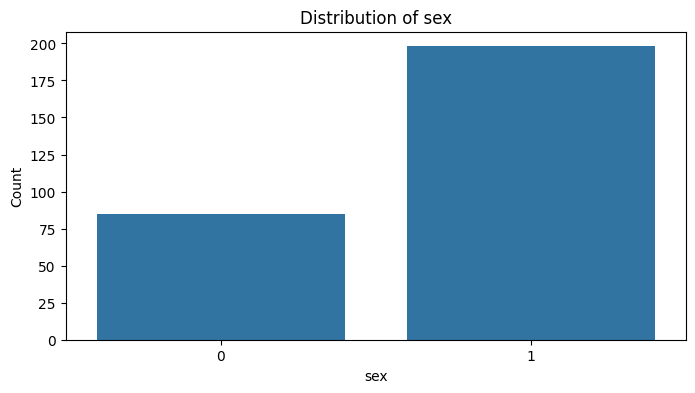

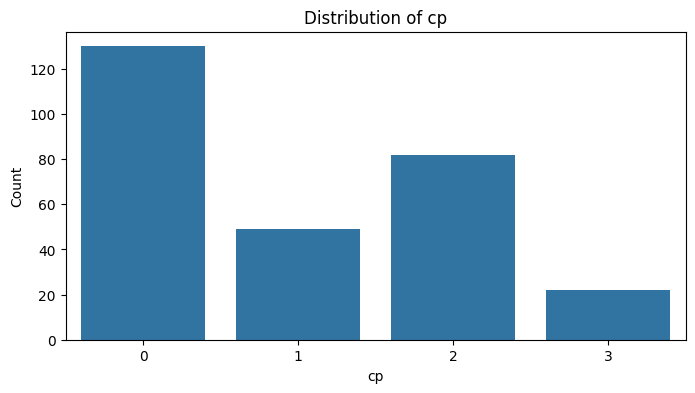

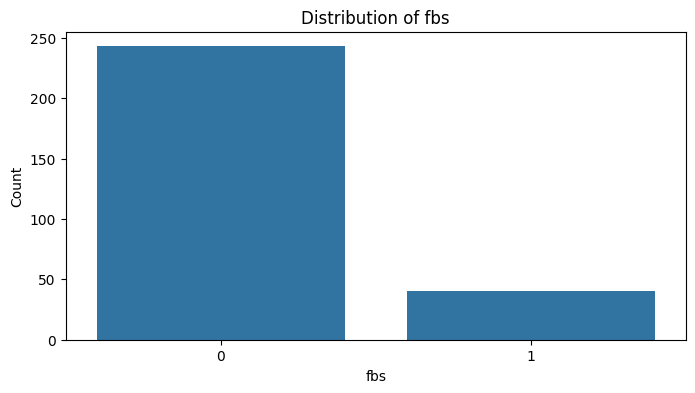

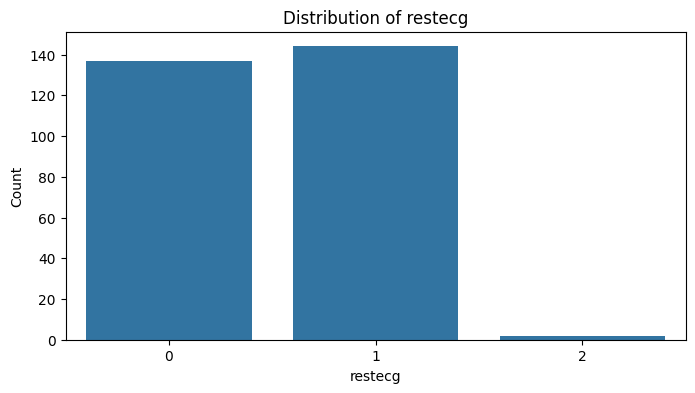

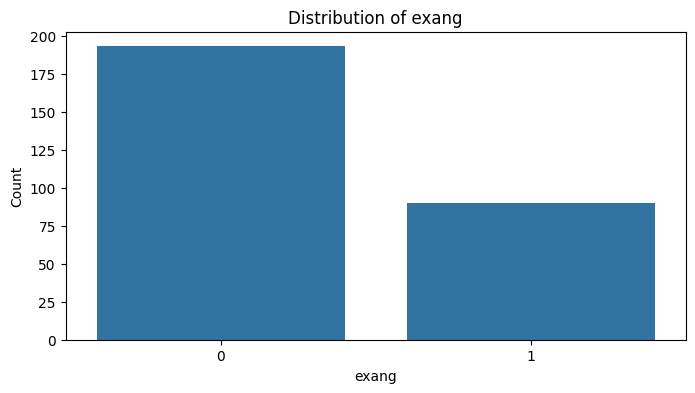

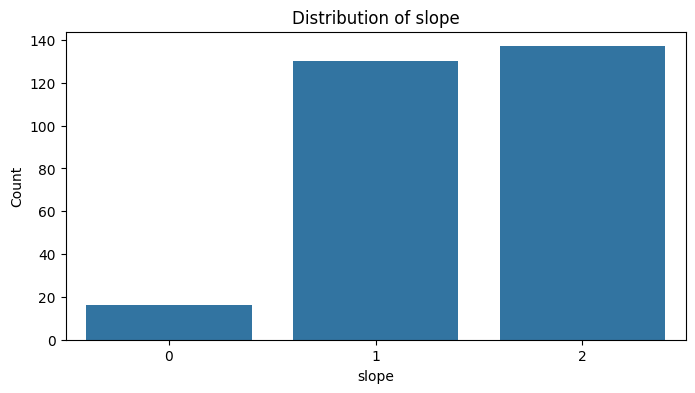

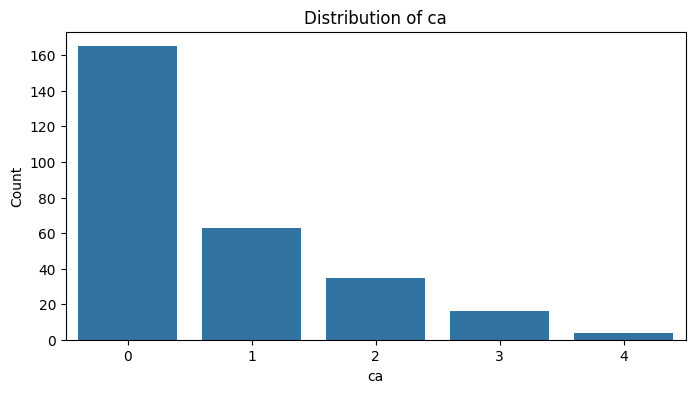

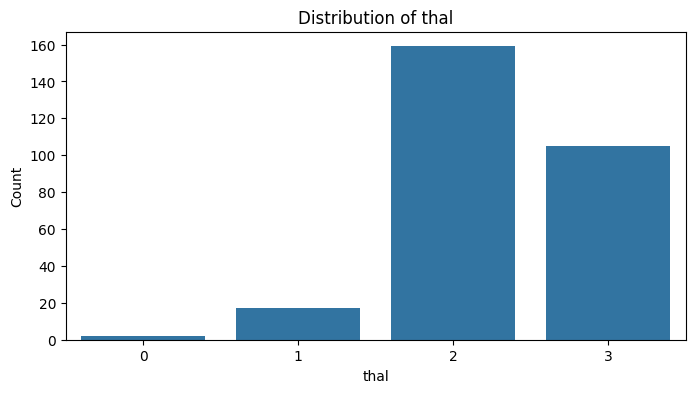

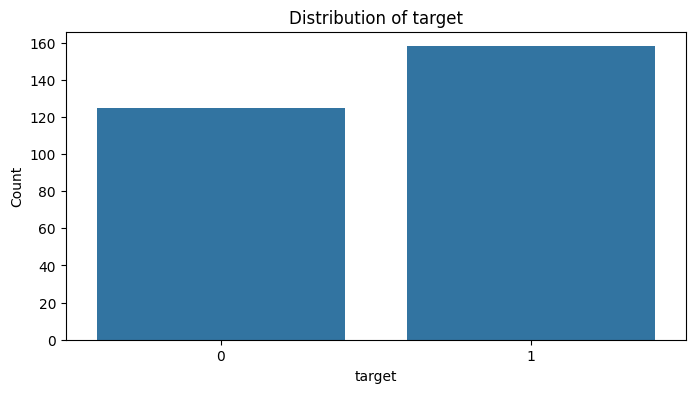

In [191]:
# Looping through the list and creating count plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=df5)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

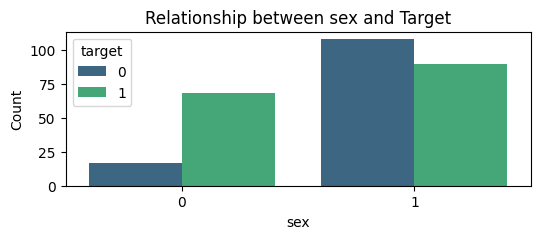

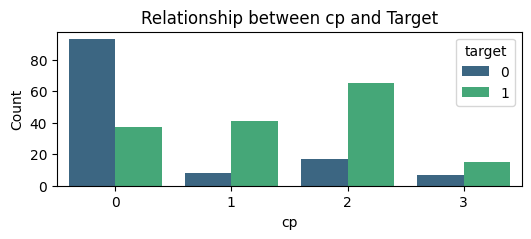

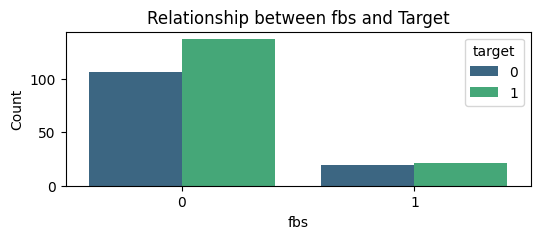

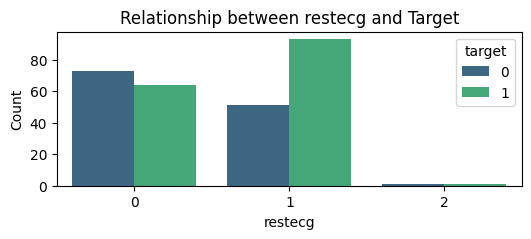

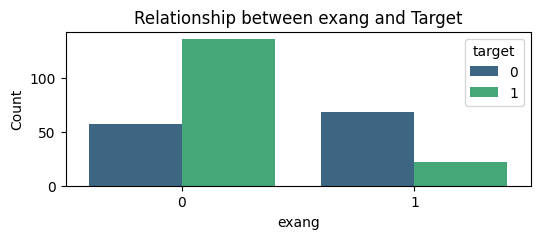

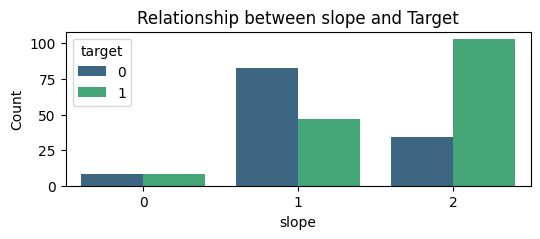

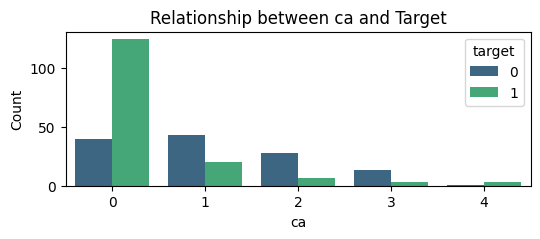

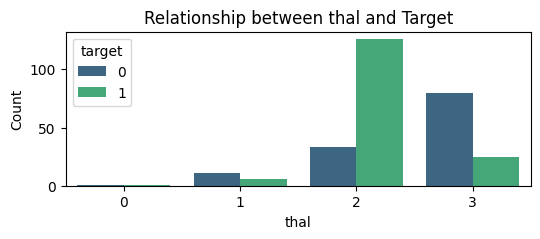

In [192]:
# To visualize the relationship between target and other categorical variables
for var in categorical_vars[:-1]:  # excluding 'target'
    plt.figure(figsize=(6, 2))
    sns.countplot(x=var, hue='target', data=df5, palette='viridis')
    plt.title(f'Relationship between {var} and Target')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

In [193]:
#More visualizations on numerical variables
# List of numerical variables
numerical_vars1 = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

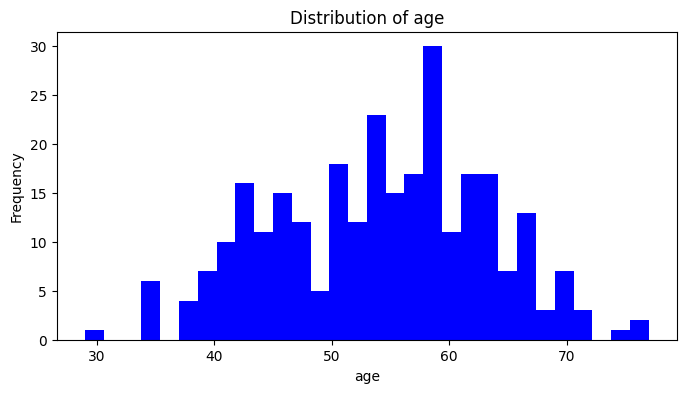

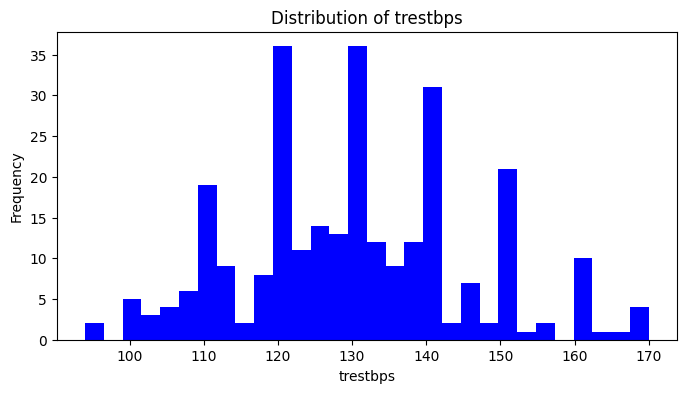

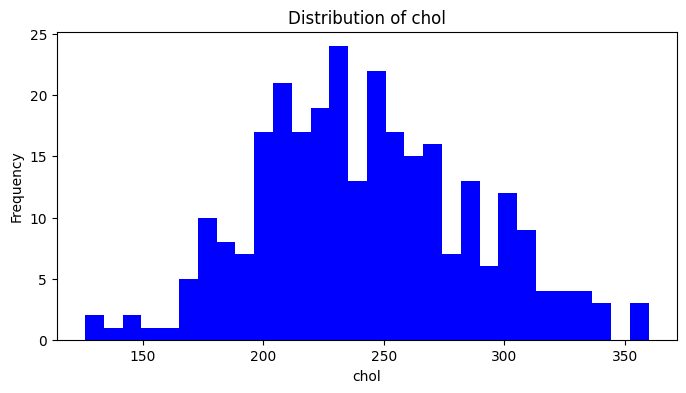

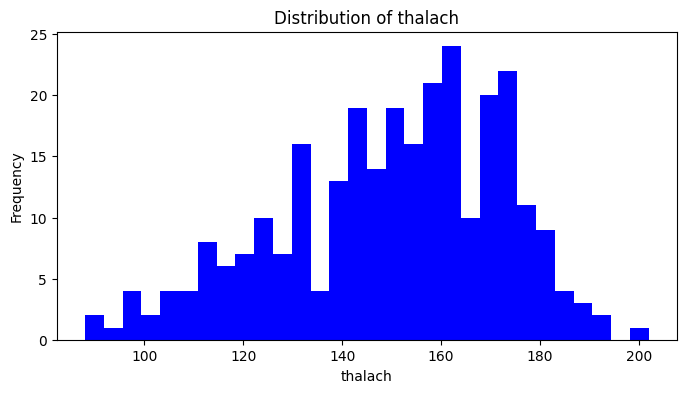

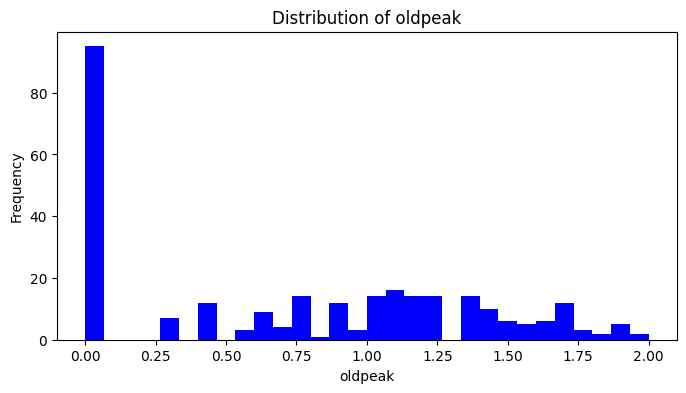

In [194]:
# Looping through the list and creating histograms for each numerical variable
for var in numerical_vars1:
    plt.figure(figsize=(8, 4))
    plt.hist(df5[var], bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [195]:
# Create a correlation matrix
corr_matrix = df5[numerical_vars1].corr()

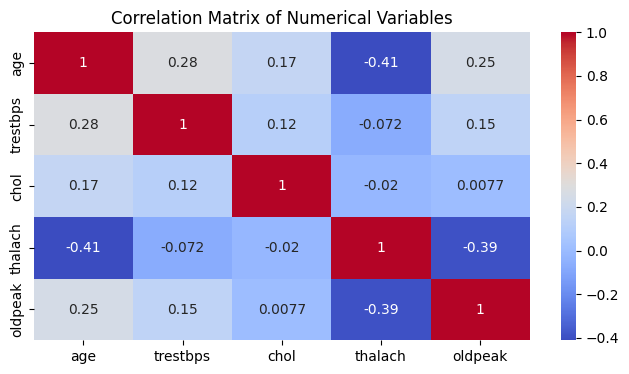

In [196]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

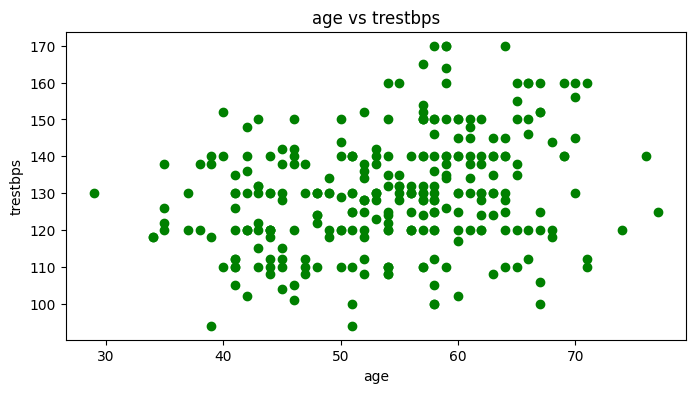

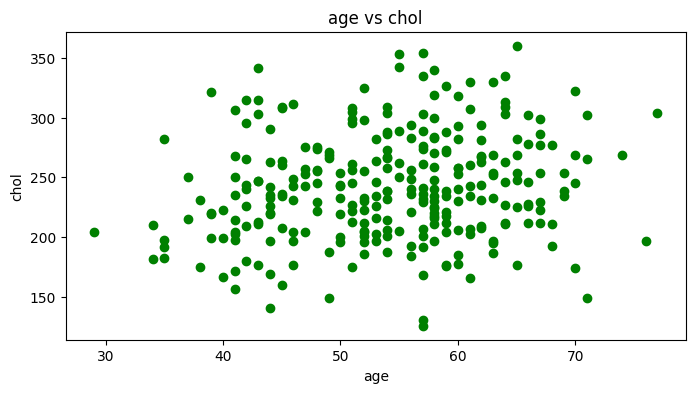

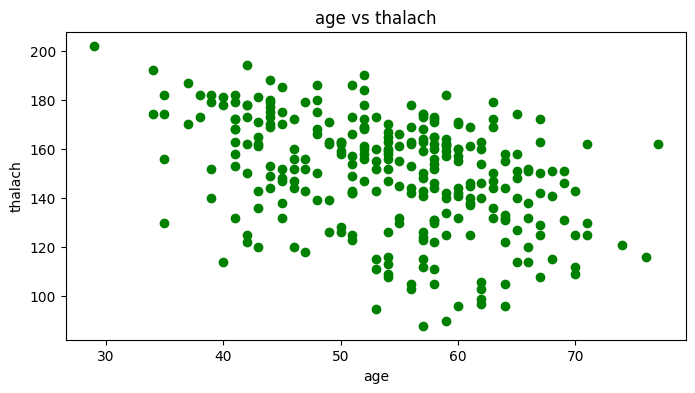

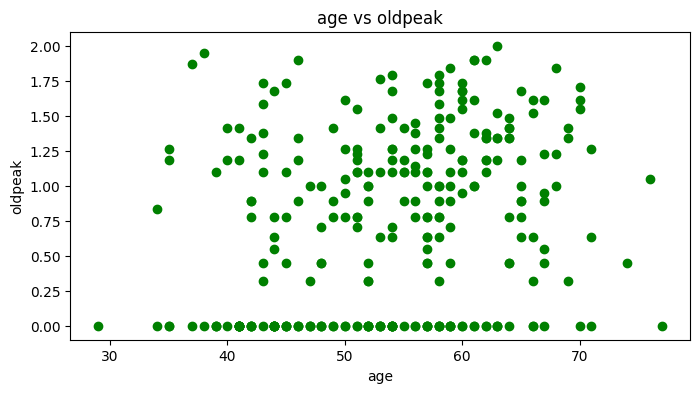

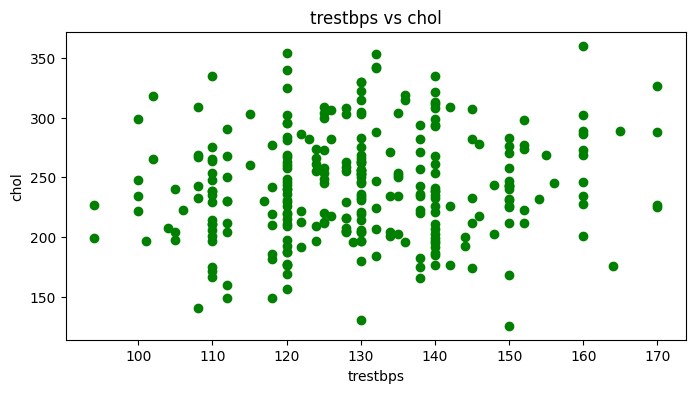

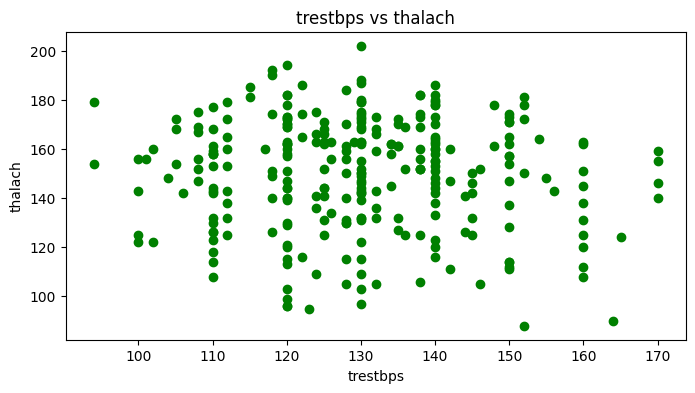

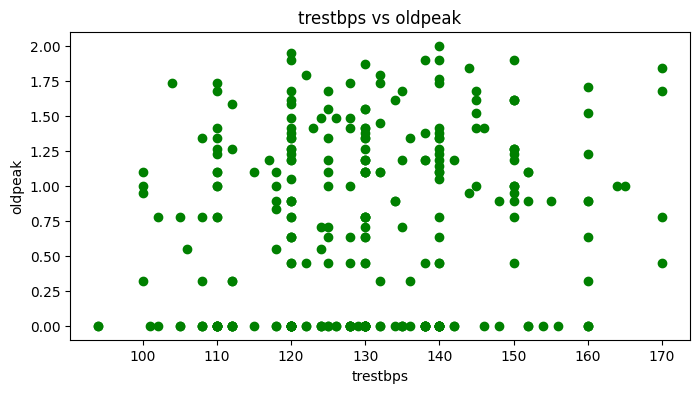

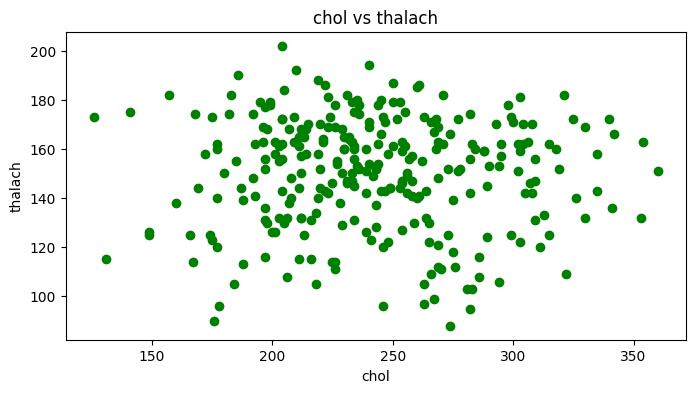

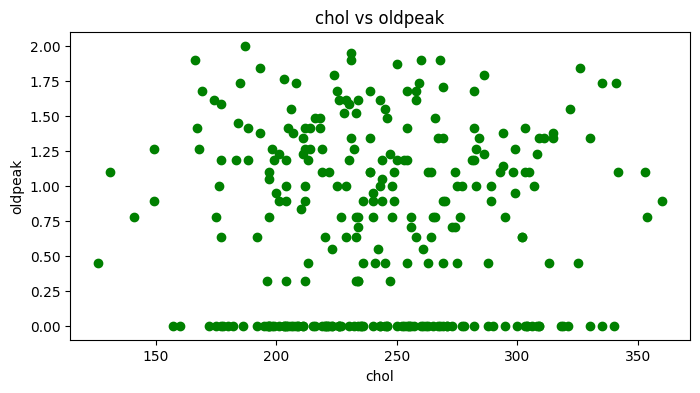

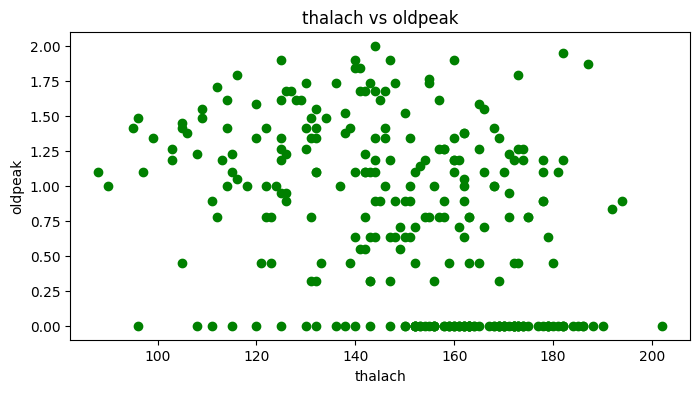

In [197]:
# Create scatter plots for each pair of numerical variables
for i in range(len(numerical_vars1)):
    for j in range(i+1, len(numerical_vars1)):
        plt.figure(figsize=(8,4))
        plt.scatter(df5[numerical_vars1[i]], df5[numerical_vars1[j]], color='Green')
        plt.title(f'{numerical_vars1[i]} vs {numerical_vars1[j]}')
        plt.xlabel(numerical_vars1[i])
        plt.ylabel(numerical_vars1[j])
        plt.show()

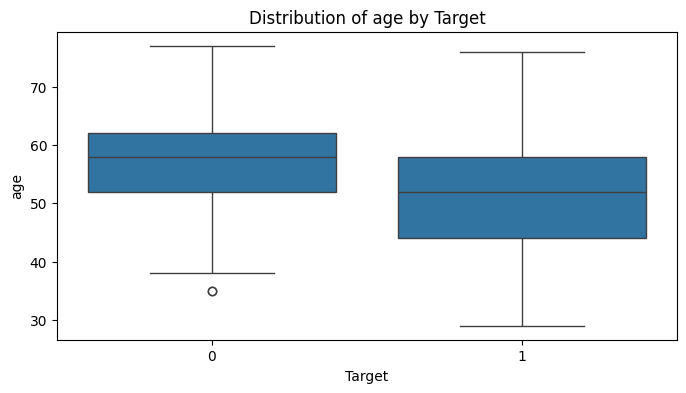

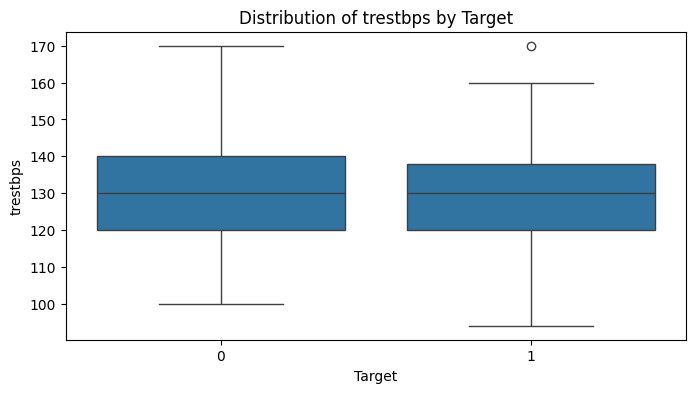

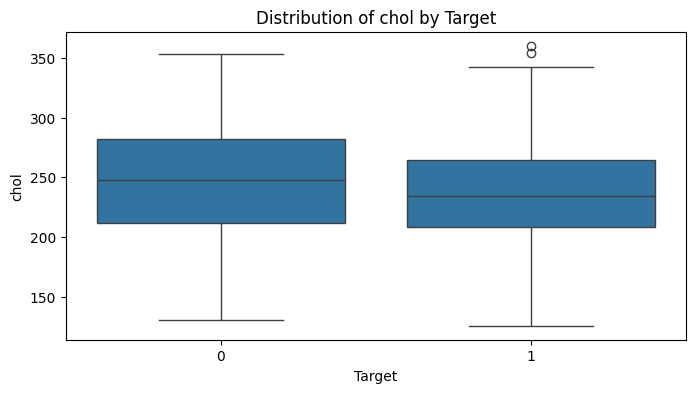

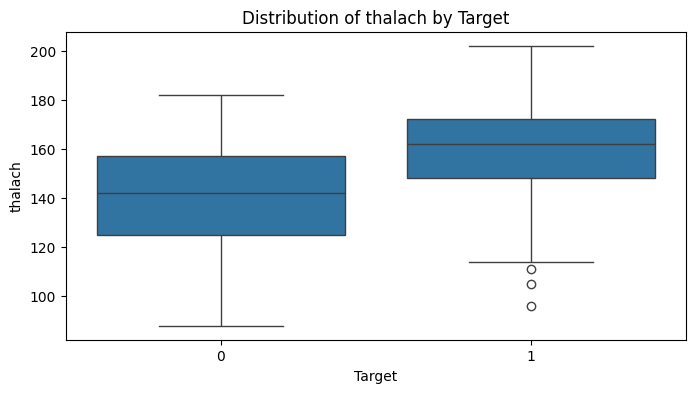

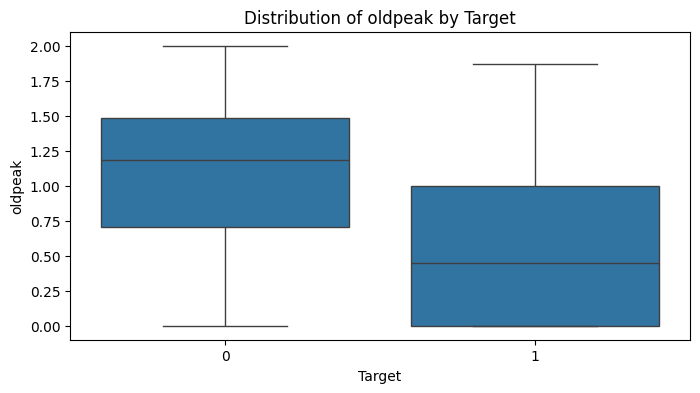

In [198]:
# Create box plots for each numerical variable against the target variable
for var in numerical_vars1:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=var, data=df5)
    plt.title(f'Distribution of {var} by Target')
    plt.xlabel('Target')
    plt.ylabel(var)
    plt.show()

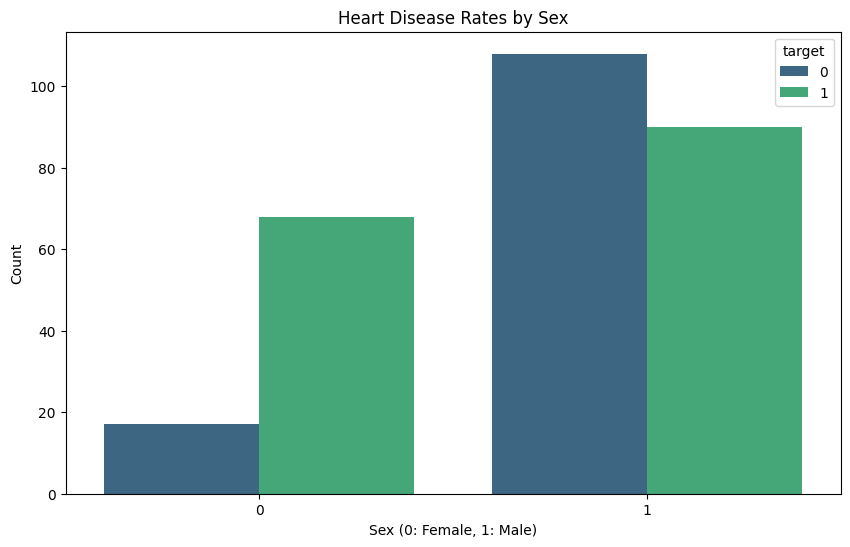

In [199]:
# Group-wise analysis of heart disease rates by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=df5, palette='viridis')
plt.title('Heart Disease Rates by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

In [200]:
# Group-wise analysis of heart disease rates by age
# First, let's create age groups
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df5['age_group'] = pd.cut(df5['age'], bins=bins, labels=labels, right=False)

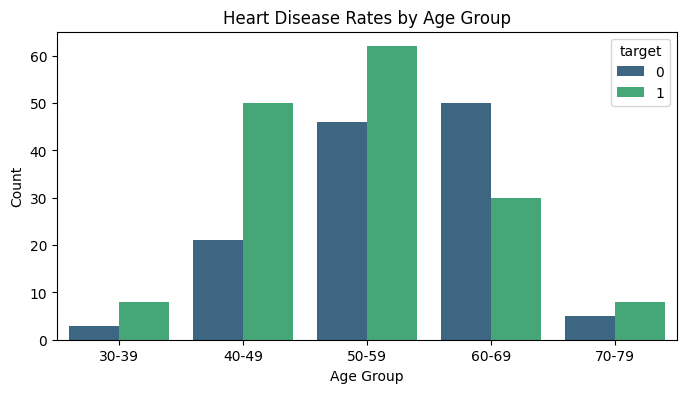

In [201]:
plt.figure(figsize=(8, 4))
sns.countplot(x='age_group', hue='target', data=df5, palette='viridis')
plt.title('Heart Disease Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

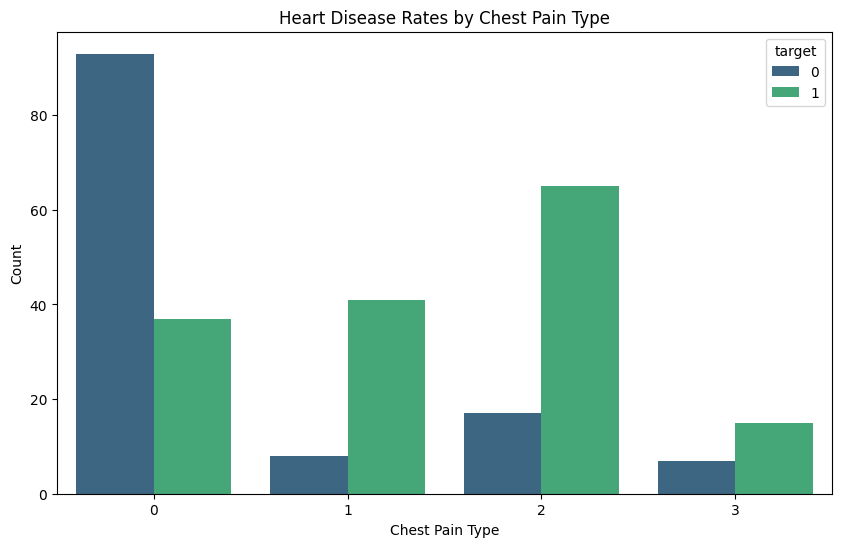

In [202]:
# Group-wise analysis of heart disease rates by chest pain type
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df5, palette='viridis')
plt.title('Heart Disease Rates by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

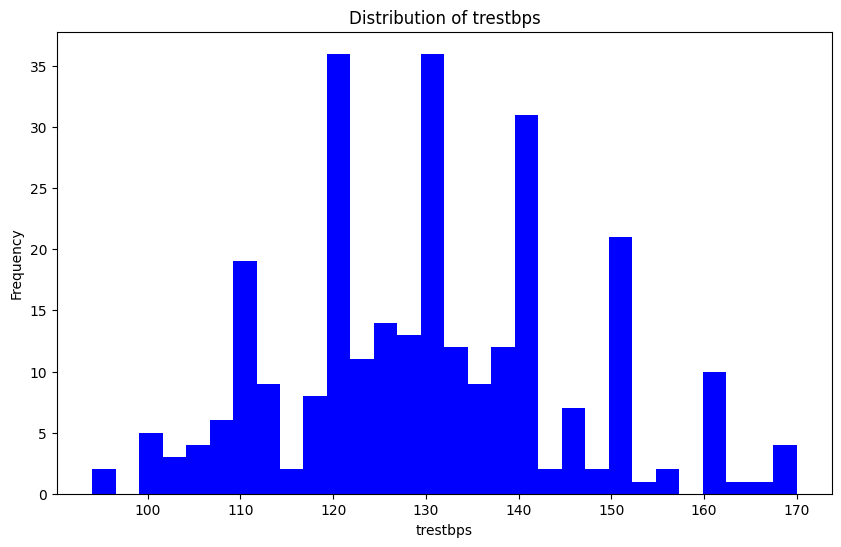

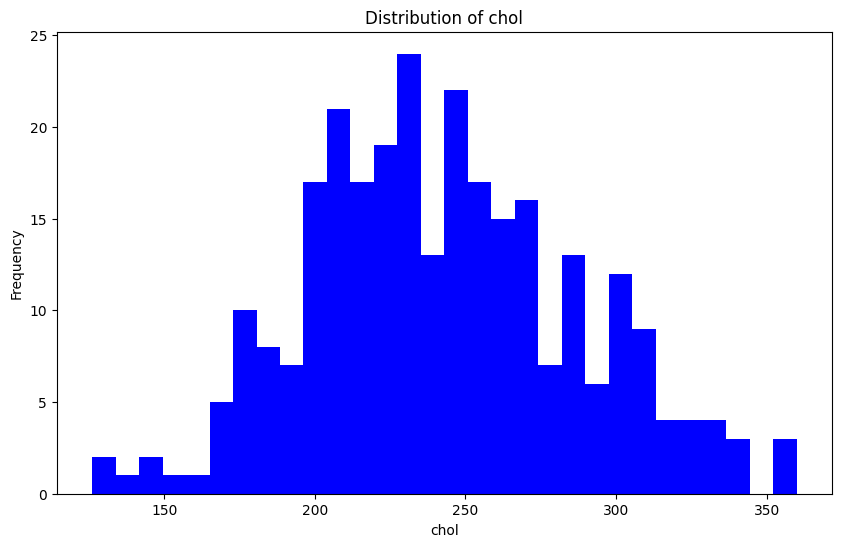

In [203]:
#Visualization for Key Metrics and Factors
# Histograms for 'trestbps' and 'chol'
for var in ['trestbps', 'chol']:
    plt.figure(figsize=(10, 6))
    plt.hist(df5[var], bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

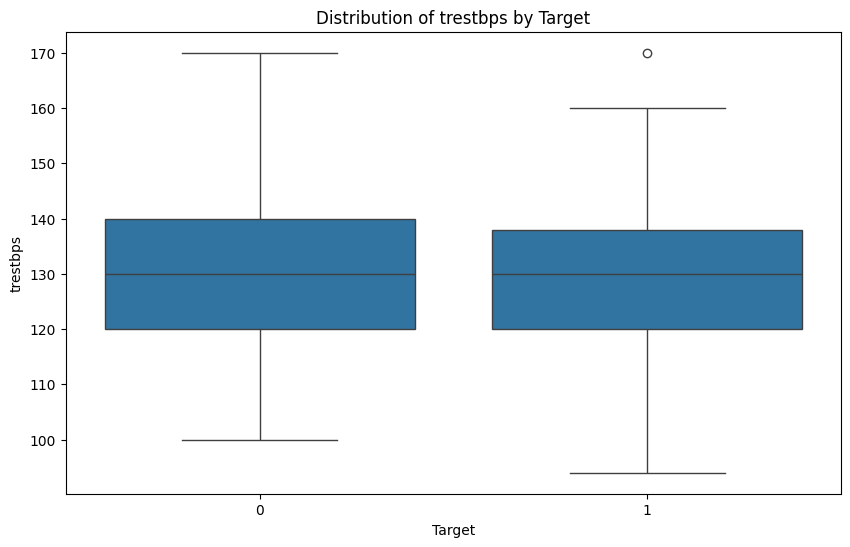

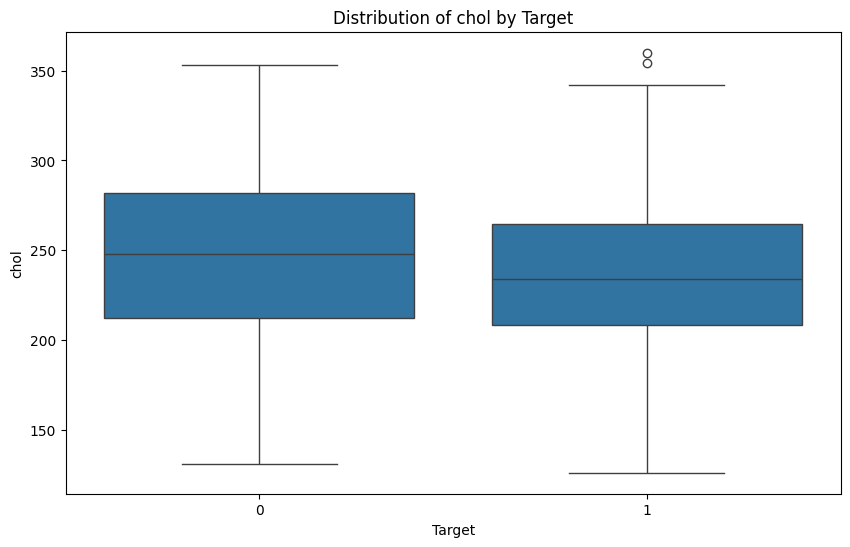

In [204]:
# Box plots for 'trestbps' and 'chol' against the target variable
for var in ['trestbps', 'chol']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=var, data=df5)
    plt.title(f'Distribution of {var} by Target')
    plt.xlabel('Target')
    plt.ylabel(var)
    plt.show()

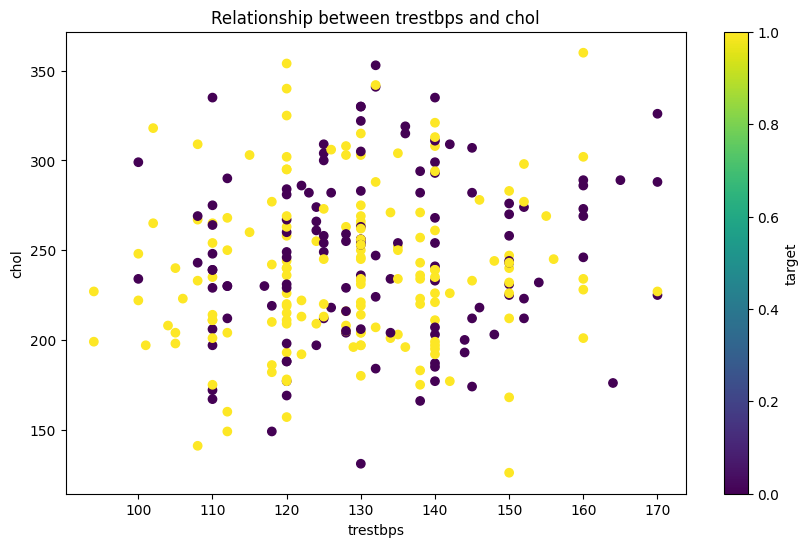

In [205]:
# Scatter plot to visualize the relationship between 'trestbps' and 'chol'
plt.figure(figsize=(10, 6))
plt.scatter(df5['trestbps'], df5['chol'], c=df5['target'], cmap='viridis')
plt.title('Relationship between trestbps and chol')
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.colorbar(label='target')
plt.show()

In [1]:
df5.to_csv('C:/Users/Narinder Singh/Downloads/HeartDiseaseAnalysis.csv', index=False)

NameError: name 'df5' is not defined

In [ ]:
#What is the Prevalence of Hear Disease Amongst Various Age groups?
